In [1]:
import pandas as pd

filmes = pd.read_csv("movies.csv")
filmes.columns = ["filmeId", "titulo", "generos"]
filmes = filmes.set_index("filmeId")
filmes.head()

,titulo,generos
filmeId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [2]:
notas = pd.read_csv("ratings.csv")
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]
notas.head()

,usuarioId,filmeId,nota,momento
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264


In [3]:
notas.describe()

,usuarioId,filmeId,nota,momento
count,126504.000000,126504.000000,126504.000000,1.265040e+05
mean,638.911078,17450.699211,3.491004,1.179441e+09
std,372.165372,34027.268169,1.091444,2.131905e+08
min,1.000000,1.000000,0.500000,1.400000e+01
25%,301.000000,1088.000000,3.000000,9.938208e+08
50%,605.000000,2580.000000,3.500000,1.142790e+09
75%,993.000000,6659.000000,4.000000,1.383230e+09
max,1240.000000,192579.000000,5.000000,1.537907e+09


# Primeira tentativa de recomendação: heurística de total de votos

In [4]:
total_de_votos = notas["filmeId"].value_counts()
total_de_votos.head()

356     421
318     419
296     415
593     392
2571    368
Name: filmeId, dtype: int64

In [5]:
filmes['total_de_votos'] = total_de_votos
filmes.head()

,titulo,generos,total_de_votos
filmeId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,300.0
2,Jumanji (1995),Adventure|Children|Fantasy,118.0
3,Grumpier Old Men (1995),Comedy|Romance,69.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,11.0
5,Father of the Bride Part II (1995),Comedy,68.0


In [6]:
filmes.sort_values("total_de_votos", ascending = False).head(10)

,titulo,generos,total_de_votos
filmeId,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,421.0
318,"Shawshank Redemption, The (1994)",Crime|Drama,419.0
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,415.0
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,392.0
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,368.0
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,368.0
527,Schindler's List (1993),Drama|War,339.0
480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,327.0
110,Braveheart (1995),Action|Drama|War,314.0


In [7]:
notas_medias = notas.groupby("filmeId").mean()["nota"]
notas_medias.head()

filmeId
1    3.893333
2    3.072034
3    3.173913
4    3.272727
5    2.889706
Name: nota, dtype: float64

In [8]:
filmes["nota_media"] = notas_medias
filmes.sort_values("total_de_votos", ascending = False).head(10)

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,421.0,4.085511
318,"Shawshank Redemption, The (1994)",Crime|Drama,419.0,4.400955
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,415.0,4.162651
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,392.0,4.044643
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,368.0,4.044837
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,368.0,4.096467
527,Schindler's List (1993),Drama|War,339.0,4.193215
480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,327.0,3.626911
110,Braveheart (1995),Action|Drama|War,314.0,4.015924


# Uma segunda heurística: nota média e filtrando votos

In [9]:
filmes.sort_values("nota_media", ascending = False).head(10)

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
140359,Doctor Who: The Waters of Mars (2009),Adventure|Children|Sci-Fi,1.0,5.0
136245,Scooby-Doo! and the Reluctant Werewolf (1988),Animation|Children|Comedy|Mystery,1.0,5.0
138908,The Pirates of Penzance (1980),Adventure|Comedy,1.0,5.0
139100,Once Brothers (2010),Documentary,1.0,5.0
6475,Opportunity Knocks (1990),Comedy,1.0,5.0
987,Bliss (1997),Drama|Romance,1.0,5.0
93733,White Night Wedding (Brúðguminn) (2008),Drama,1.0,5.0
55620,For the Bible Tells Me So (2007),Documentary,1.0,5.0
793,My Life and Times With Antonin Artaud (En comp...,Drama,1.0,5.0


In [10]:
filmes.query("total_de_votos >= 10").sort_values("nota_media", ascending = False).head(10)

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
2859,Stop Making Sense (1984),Documentary|Musical,10.0,4.600000
3629,"Gold Rush, The (1925)",Adventure|Comedy|Romance,12.0,4.583333
2186,Strangers on a Train (1951),Crime|Drama|Film-Noir|Thriller,30.0,4.566667
55908,"Man from Earth, The (2007)",Drama|Sci-Fi,17.0,4.500000
3196,Stalag 17 (1953),Drama|War,13.0,4.500000
3469,Inherit the Wind (1960),Drama,14.0,4.464286
3022,"General, The (1926)",Comedy|War,14.0,4.464286
3543,Diner (1982),Comedy|Drama,11.0,4.454545
2203,Shadow of a Doubt (1943),Crime|Drama|Thriller,14.0,4.428571


In [11]:
filmes_com_mais_de_50_votos = filmes.query("total_de_votos >= 50")
filmes_com_mais_de_50_votos.sort_values("nota_media", ascending = False).head(10)


,titulo,generos,total_de_votos,nota_media
filmeId,,,,
318,"Shawshank Redemption, The (1994)",Crime|Drama,419.0,4.400955
2019,Seven Samurai (Shichinin no samurai) (1954),Action|Adventure|Drama,70.0,4.328571
1203,12 Angry Men (1957),Drama,82.0,4.304878
858,"Godfather, The (1972)",Crime|Drama,279.0,4.274194
750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,117.0,4.264957
50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,276.0,4.231884
109487,Interstellar (2014),Sci-Fi|IMAX,92.0,4.228261
1267,"Manchurian Candidate, The (1962)",Crime|Thriller|War,52.0,4.221154
2858,American Beauty (1999),Drama|Romance,266.0,4.212406


In [12]:
eu_assisti = [1, 21, 19, 10, 11, 7, 2]
filmes.loc[eu_assisti]

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,300.0,3.893333
21,Get Shorty (1995),Comedy|Crime|Thriller,126.0,3.472222
19,Ace Ventura: When Nature Calls (1995),Comedy,115.0,2.639130
10,GoldenEye (1995),Action|Adventure|Thriller,155.0,3.451613
11,"American President, The (1995)",Comedy|Drama|Romance,105.0,3.604762
7,Sabrina (1995),Comedy|Romance,65.0,2.907692
2,Jumanji (1995),Adventure|Children|Fantasy,118.0,3.072034


In [13]:
aventura_infantil_e_fantasia = filmes_com_mais_de_50_votos.query("generos=='Adventure|Children|Fantasy'")
aventura_infantil_e_fantasia.drop(eu_assisti, errors='ignore').sort_values("nota_media", ascending = False).head(10)

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
4896,Harry Potter and the Sorcerer's Stone (a.k.a. ...,Adventure|Children|Fantasy,116.0,3.551724


In [0]:
# Collaborative filtering x Content based filtering

# Procurar usuários "similares"

- joão deu nota 4 no filme toy story
- maria deu nota 5 no filme toy story
- paulo deu nota 3 no filme toy story
- joana deu nota 3.5 no filme toy story

x-y ==> distância

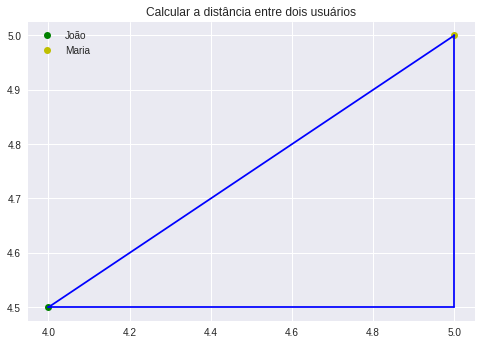

In [15]:
import matplotlib.pyplot as plt
plt.plot(4, 4.5, "go")
plt.plot(5, 5, "yo")
plt.legend(["João", "Maria"])
plt.title("Calcular a distância entre dois usuários")

plt.plot([4, 5], [4.5, 4.5], color="b", linestyle="-")
plt.plot([4, 5], [4.5, 5], color="b", linestyle="-")
plt.plot([5, 5], [4.5, 5], color="b", linestyle="-")

In [16]:
import numpy as np

joao = np.array([4, 4.5])
maria = np.array([5, 5])

joao - maria

array([-1. , -0.5])

In [17]:
from math import sqrt

def pitagoras(a,b):
  (delta_x, delta_y) = a - b
  return sqrt(delta_x * delta_x + delta_y * delta_y)

pitagoras(joao, maria)

1.118033988749895

In [18]:
def pitagoras(a,b):
  return np.linalg.norm(a - b)

pitagoras(joao, maria)

1.118033988749895

Text(0.5,1,'Calcular a distância entre usuários')

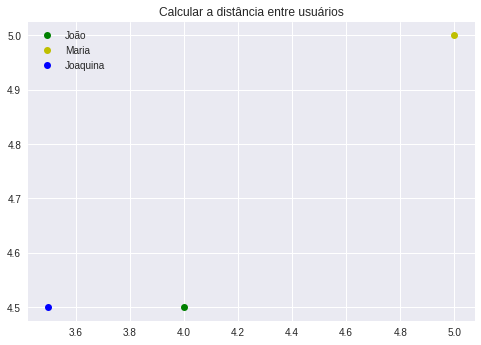

In [19]:
import matplotlib.pyplot as plt
plt.plot(4, 4.5, "go")
plt.plot(5, 5, "yo")
plt.plot(3.5, 4.5, "bo")
plt.legend(["João", "Maria", "Joaquina"])
plt.title("Calcular a distância entre usuários")


In [20]:
joaquina = np.array([3.5, 4.5])

print(pitagoras(joao, maria))
print(pitagoras(joao, joaquina))

1.118033988749895
0.5


# Distância entre usuários do dataset

In [0]:
def distancia_de_vetores(a,b):
  return np.linalg.norm(a - b)


In [0]:
def notas_do_usuario(usuario):
  notas_do_usuario = notas.query("usuarioId==%d" % usuario)
  notas_do_usuario = notas_do_usuario[["filmeId", "nota"]].set_index("filmeId")
  return notas_do_usuario

In [0]:
usuario1 = notas_do_usuario(1)
usuario4 = notas_do_usuario(4)

In [32]:
usuario1.head()

,nota
filmeId,
307,3.5
481,3.5
1091,1.5
1257,4.5
1449,4.5


In [33]:
usuario4.head()

,nota
filmeId,
1,4.0
2,4.0
5,2.0
6,4.5
10,4.0


In [42]:
diferencas = usuario1.join(usuario4, lsuffix="_esquerda", rsuffix="_direita").dropna()
distancia_de_vetores(diferencas['nota_esquerda'], diferencas['nota_direita'])

3.0413812651491097

In [0]:
def distancia_de_usuarios(usuario_id1, usuario_id2):
  notas1 = notas_do_usuario(usuario_id1)
  notas2 = notas_do_usuario(usuario_id2)
  diferencas = notas1.join(notas2, lsuffix="_esquerda", rsuffix="_direita").dropna()
  distancia =  distancia_de_vetores(diferencas['nota_esquerda'], diferencas['nota_direita'])
  return [usuario_id1, usuario_id2, distancia]

In [51]:
distancia_de_usuarios(1,4)

[1, 4, 3.0413812651491097]

In [52]:
quantidade_de_usuarios = len(notas['usuarioId'].unique())
print("Temos %d usuarios" % quantidade_de_usuarios)

Temos 1240 usuarios


In [56]:
def distancia_de_todos(voce_id):
  distancias = []
  for usuario_id in notas['usuarioId'].unique():
    informacoes = distancia_de_usuarios(voce_id, usuario_id)
    distancias.append(informacoes)
  return distancias

distancia_de_todos(1)[:5]

[[1, 1, 0.0],
 [1, 2, 0.0],
 [1, 3, 0.0],
 [1, 4, 3.0413812651491097],
 [1, 5, 0.0]]

In [58]:
def distancia_de_todos(voce_id):
  todos_os_usuarios = notas['usuarioId'].unique()
  distancias = [distancia_de_usuarios(voce_id, usuario_id) for usuario_id in todos_os_usuarios]
  distancias = pd.DataFrame(distancias, columns = ["voce", "outra_pessoa", "distancia"])
  return distancias

distancia_de_todos(1).head()

,voce,outra_pessoa,distancia
0,1,1,0.000000
1,1,2,0.000000
2,1,3,0.000000
3,1,4,3.041381
4,1,5,0.000000


In [62]:
notas_do_usuario(1).join(notas_do_usuario(5), lsuffix="_1", rsuffix="5").dropna()

,nota_1,nota5
filmeId,,


In [64]:
notas_do_usuario(1).join(notas_do_usuario(2), lsuffix="_1", rsuffix="2").dropna()

,nota_1,nota2
filmeId,,


In [65]:
notas_do_usuario(1).join(notas_do_usuario(3), lsuffix="_1", rsuffix="3").dropna()

,nota_1,nota3
filmeId,,


# Usuários sem filmes em comum são colocados bem distante um do outro

In [0]:
def distancia_de_usuarios(usuario_id1, usuario_id2, minimo = 5):
  notas1 = notas_do_usuario(usuario_id1)
  notas2 = notas_do_usuario(usuario_id2)
  diferencas = notas1.join(notas2, lsuffix="_esquerda", rsuffix="_direita").dropna()
  
  if(len(diferencas) < minimo):
    return [usuario_id1, usuario_id2, 100000]
  
  distancia =  distancia_de_vetores(diferencas['nota_esquerda'], diferencas['nota_direita'])
  return [usuario_id1, usuario_id2, distancia]

In [69]:
distancia_de_todos(1).head()

,voce,outra_pessoa,distancia
0,1,1,0.000000
1,1,2,100000.000000
2,1,3,100000.000000
3,1,4,3.041381
4,1,5,100000.000000


In [0]:
def mais_proximos_de(voce_id):
  distancias = distancia_de_todos(voce_id)
  distancias = distancias.sort_values("distancia")
  distancias = distancias.set_index("outra_pessoa").drop(voce_id)
  return distancias

In [74]:
mais_proximos_de(1).head()

,voce,distancia
outra_pessoa,,
214,1,1.118034
593,1,1.118034
590,1,1.322876
1180,1,1.414214
235,1,1.732051
